## Image Classification using Convolutional Neural Networks (CNNs) with CIFAR-10 Dataset


## CIFAR-10 Dataset

The CIFAR-10 dataset is a popular benchmark dataset for image classification. It consists of 60,000 32x32 color images categorized into 10 classes:

* Airplane
* Automobile
* Bird
* Cat
* Deer
* Dog
* Frog
* Horse
* Ship
* Truck

There are 6,000 images per class, with 50,000 images designated for training and 10,000 for testing.

This dataset is widely used for training and evaluating machine learning and computer vision models.

**For more information, [Click here](https://www.cs.toronto.edu/~kriz/cifar.html).**

####Importing the neccessary libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from google.colab import files
import seaborn as sns
from sklearn.metrics import confusion_matrix
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam, RMSprop, Adadelta
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import regularizers
from sklearn.metrics import confusion_matrix , classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import imgaug as ia
import imgaug.augmenters as iaa
from PIL import Image

####Loading the cifar10 dataset from Keras

In [ ]:
# Loading the data
(X_train, Y_train), (X_test, Y_test) = datasets.cifar10.load_data()

# Normalizing the data
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

print('Features -------------> Normalized.')

# Flattening the labels
Y_train = Y_train.reshape(-1)
Y_test = Y_test.reshape(-1)

print('Labels -------------> Reshaped.')

# Splitting training data into training and validation sets
# 20% of training data for validation
val_split = 0.2
val_samples = int(len(X_train) * val_split)



# Shuffle the training data
indices = np.random.permutation(len(X_train))
X_train_shuffled = X_train[indices]
Y_train_shuffled = Y_train[indices]

# Split into training and validation
X_val = X_train_shuffled[:val_samples]
Y_val = Y_train_shuffled[:val_samples]
X_train = X_train_shuffled[val_samples:]
Y_train = Y_train_shuffled[val_samples:]
print('Data Split into training and validation -------------> Done')

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
Features -------------> Normalized.
Labels -------------> Reshaped.
Data Split into training and validation -------------> Done


In [ ]:
X_train.shape

(40000, 32, 32, 3)

In [ ]:
X_val.shape

(10000, 32, 32, 3)

Defining names of the 10 classes in cifar-10

In [ ]:
classes = ["airplane" , "automobile" , "bird" , "cat" , "deer", "dog" , "frog", " horse" , "ship" , "truck"]

In [ ]:
classes[9]

'truck'

In [ ]:
Y_train[:5]

array([1, 8, 3, 7, 7], dtype=uint8)

Function to plot the image of the given datatset and index

In [ ]:
def plot_sample(X,Y, index):
  plt.figure(figsize=(15,2))
  plt.imshow(X[index])
  plt.xlabel(classes[Y[index]])

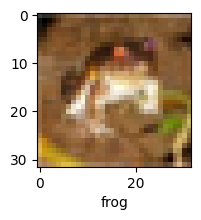

In [ ]:
plot_sample(X_train, Y_train, 0)

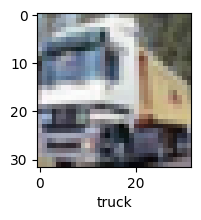

In [ ]:
plot_sample(X_train, Y_train, 1)

## Training parameters

In [ ]:
BATCH_SIZE = 32
N_EPOCH = 100
N_CLASSES = 10
VERBOSE = 1
VALIDATION_SPLIT = 0.2
OPTIM =  Adam() # RMSprop()
INPUT_SHAPE = (32, 32, 3)
l2_values=[1e-3, 1e-4, 1e-5, 1e-6]
L2_VALUE = 0.001

print('Initialised -------------> Main parameters.')

Initialised -------------> Main parameters.


## Defining a function for early stopping

In [ ]:
early_stopping = EarlyStopping(
    monitor='val_accuracy',
    patience= 15,
    restore_best_weights=True
)

##Creating a Simple ANN before using convolution

In [ ]:
ANN_model = models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000, activation='relu'),
    layers.Dense(1000, activation='relu'),
    layers.Dense(N_CLASSES, activation='sigmoid')
])

ANN_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ANN_model.fit(X_train, Y_train, epochs=N_EPOCH//10)

In [ ]:
ANN_model.evaluate(X_test, Y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4950 - loss: 1.4496


[1.450731635093689, 0.4900999963283539]

####Printing the classification Report

In [ ]:
import numpy as np
y_pred = ANN_model.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("C1assification Report: \n", classification_report(Y_test, y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
C1assification Report: 
               precision    recall  f1-score   support

           0       0.51      0.56      0.53      1000
           1       0.70      0.43      0.53      1000
           2       0.36      0.37      0.36      1000
           3       0.37      0.21      0.27      1000
           4       0.44      0.32      0.37      1000
           5       0.40      0.41      0.40      1000
           6       0.43      0.65      0.52      1000
           7       0.59      0.49      0.54      1000
           8       0.47      0.73      0.57      1000
           9       0.51      0.53      0.52      1000

    accuracy                           0.47     10000
   macro avg       0.48      0.47      0.46     10000
weighted avg       0.48      0.47      0.46     10000



##Creating a simple convolution Neural Network

In [ ]:
CNN_model = models.Sequential([

    # CNN
    # first convolution + pooling
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),

    # Second convolution + pooling
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),

    # Fully connected for classification
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(N_CLASSES, activation='softmax') # 10 is the number of neurons
    ])


CNN_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

CNN_model.fit(X_train, Y_train, epochs=N_EPOCH//10)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.3702 - loss: 1.7154
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.5908 - loss: 1.1598
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6519 - loss: 0.9998
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6791 - loss: 0.9262
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7079 - loss: 0.8506
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7239 - loss: 0.7908
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7444 - loss: 0.7415
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7635 - loss: 0.6840
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7758 - loss: 0.6430
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7894 - loss: 0.6026


In [ ]:
CNN_model.evaluate(X_test,Y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6915 - loss: 0.9337


[0.9412251710891724, 0.6933000087738037]

####Printing the Classification Report

In [ ]:
Y_pred = CNN_model.predict(X_test)
pred_classes = [np.argmax(element) for element in Y_pred]

print("C1assification Report: \n", classification_report(Y_test, pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
C1assification Report: 
               precision    recall  f1-score   support

           0       0.70      0.73      0.71      1000
           1       0.77      0.83      0.80      1000
           2       0.52      0.66      0.58      1000
           3       0.60      0.41      0.49      1000
           4       0.62      0.67      0.64      1000
           5       0.61      0.62      0.62      1000
           6       0.83      0.71      0.77      1000
           7       0.73      0.75      0.74      1000
           8       0.79      0.81      0.80      1000
           9       0.79      0.74      0.76      1000

    accuracy                           0.69     10000
   macro avg       0.70      0.69      0.69     10000
weighted avg       0.70      0.69      0.69     10000



## Increasing Accuracy with Advanced Techniques

* **Data Augmentation**
    * Artificially expanding the dataset by creating variations of existing data points.
    * Common techniques include:
        * Random cropping and flipping
        * Color jittering and noise injection
        * Data synthesis using generative models
* **Regularization**
    * Introducing penalties to the model's loss function to prevent overfitting.
    * Popular regularization methods:
        * L1 and L2 regularization
        * Dropout
        * Early stopping
* **Ensemble Methods**
    * Combining multiple models to improve overall performance.
    * Common ensemble techniques:
        * Simple Averaging
        * Majority Vote
        * Bagging (e.g., Random Forest)
        * Boosting (e.g., Gradient Boosting, XGBoost)
        * Stacking
* **Hyperparameter Tuning**
    * Optimizing model parameters through systematic experimentation.
    * Techniques like Grid Search and Randomized Search can be used to explore the hyperparameter space.
* **Transfer Learning**
    * Leveraging knowledge from pre-trained models on large datasets.
    * Fine-tuning pre-trained models on specific tasks can significantly improve accuracy.
* **Advanced Optimization Algorithms**
    * Employing efficient optimization algorithms to find the optimal model parameters.
    * Popular choices include:
        * Adam
        * RMSprop
        * Adadelta
* **Feature Engineering**
    * Creating informative features from raw data to enhance model performance.
    * Techniques like feature scaling, normalization, and dimensionality reduction can be applied.

By effectively combining these techniques, we can significantly boost the accuracy of your machine learning models. These techniques will be considered in the future projects

## Data Augmentation

Data augmentation is employed to artificially increase the size of the training dataset and improve the model's generalization ability. The following techniques are used:

* `rotation_range=15`: Randomly rotate images by up to 15 degrees.
* `width_shift_range=0.1`: Randomly shift images horizontally by up to 10% of the width.
* `height_shift_range=0.1`: Randomly shift images vertically by up to 10% of the height.
* `horizontal_flip=True`: Randomly flip images horizontally.

In [ ]:
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = datagen.flow(X_train, Y_train, batch_size=BATCH_SIZE)

Instead of using data augmentation on the fly, we are using static data augmentation for **speeding up the training process**. In this case, the following augmentations are used:

* **`iaa.Fliplr(0.5)`:** Randomly flips images horizontally with a 50% probability. This helps the model learn features that are invariant to left-right orientation.
* **`iaa.Crop(percent=(0, 0.1))`:**  Randomly crops images by up to 10%. This forces the model to learn features from different parts of the image and reduces the reliance on specific regions.
* **`iaa.Affine(rotate=(-15, 15))`:** Randomly rotates images between -15 and 15 degrees. This helps the model become invariant to slight rotations in the input data.
* **`iaa.Affine(translate_percent={"x": (-0.1, 0.1), "y": (-0.1, 0.1)})`:** Randomly translates images horizontally and vertically by up to 10% of the image width and height, respectively. This helps the model learn features that are robust to changes in object position.

These augmentations are applied sequentially to the training, test, and validation sets (`X_train`, `X_test`, `X_val`) using the `iaa.Sequential` object. This ensures that the model is trained and evaluated on a diverse set of images, leading to improved performance and generalization.

In [ ]:
seq = iaa.Sequential([
    # Horizontal flips
    iaa.Fliplr(0.5),
    # Random crops
    iaa.Crop(percent=(0, 0.1)),
    # Rotations
    iaa.Affine(rotate=(-15, 15)),
    # Translations
    iaa.Affine(translate_percent={"x": (-0.1, 0.1), "y": (-0.1, 0.1)})
])

# 2. Applying the augmentations
X_train_aug = seq(images=X_train)
X_test_aug = seq(images=X_test)
X_val_aug = seq(images=X_val)

## CNN Model 1: Architecture and Implementation

This document details the architecture and implementation of your CNN model (CNN_model_1) for image classification. The model leverages convolutional layers, batch normalization, dropout regularization, and a learning rate scheduler to enhance performance.

**Model Architecture:**

*   **Convolutional Blocks:**
    *   Three progressively deeper convolutional blocks (32, 64, 128 filters) with the following structure:
        *   Two `Conv2D` layers with `relu` activation for feature extraction.
        *   Kernel size of (3, 3) for all convolutional layers.
        *   `padding='same'` to maintain spatial dimensions.
        *   `BatchNormalization` layers for faster training and improved activation stability.
        *   `l2` kernel regularization (weight decay) with a learning rate of 0.001 to prevent overfitting (determined by experiments).
    *   `MaxPooling2D` layers with a pool size of (2, 2) for downsampling after each block.
    *   `Dropout` layers with increasing rates (0.25, 0.35, 0.4) across blocks for further overfitting prevention.

*   **Dense Layers:**
    *   `Flatten` layer to transform feature maps into a 1D vector.
    *   `Dense` layer with 512 neurons and `relu` activation for higher-level feature representation.
    *   `BatchNormalization` layer for activation stabilization.
    *   `Dropout` layer with a rate of 0.5 to prevent overfitting.
    *   Final `Dense` layer with `N_CLASSES` neurons and `softmax` activation for multi-class classification (probability distribution over classes).

**Implementation:**

The provided code snippet demonstrates the creation and compilation of CNN_model_1 using Keras.

*   **Model Creation:**
    *   The model is built sequentially using `models.Sequential`.
    *   Each convolutional block, including `Conv2D`, `BatchNormalization`, `Activation`, `MaxPooling2D`, and `Dropout` layers, is defined sequentially.
    *   The fully connected layers (`Flatten`, `Dense`, `BatchNormalization`, and `Dropout`) are then added.
    *   The final output layer uses a `Dense` layer with `N_CLASSES` and `softmax` activation.

*   **Model Compilation:**
    *   The model is compiled with the `Adam` optimizer set to an initial learning rate of 0.001.
    *   The loss function is `sparse_categorical_crossentropy` for multi-class classification.
    *   The metric used is `accuracy` to track classification performance.

**Training Options:**

The code showcases two training approaches:

1.  **Static Data Augmentation:**
    *   A custom learning rate scheduler function `lr_schedule` is defined to reduce the learning rate by a factor of 0.5 every 10 epochs.
    *   The model is trained using pre-augmented data (`X_train_aug` and `Y_train`) with validation data (`X_val_aug` and `Y_val`).
    *   Early stopping and the learning rate scheduler are included as callbacks during training.

2.  **On-the-fly Data Augmentation:**
    *   An `ImageDataGenerator` object (`datagen`) is defined to implement real-time data augmentation techniques like rotation, shifting, shearing, zooming, and horizontal flipping.
    *   The `flow` method from `ImageDataGenerator` creates a training generator (`train_generator`) that applies these transformations during training.
    *   The model is trained using the training generator and the original validation data (`X_val` and `Y_val`).
    *   Similar callbacks (early stopping and learning rate scheduler) are used for training control.

### Compliling the model

In [ ]:
%%time

CNN_model_1 = models.Sequential([
        # First Convolution Block
        layers.Conv2D(filters=32, kernel_size=(3, 3), padding='same', input_shape=INPUT_SHAPE, kernel_regularizer=regularizers.l2(0.001)),
        layers.BatchNormalization(),
        layers.Activation('relu'),
        layers.Conv2D(filters=32, kernel_size=(3, 3), padding='same', kernel_regularizer=regularizers.l2(0.001)),
        layers.BatchNormalization(),
        layers.Activation('relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.25),

        # Second Convolutional Block
        layers.Conv2D(filters=64, kernel_size=(3, 3), padding='same', kernel_regularizer=regularizers.l2(0.001)),
        layers.BatchNormalization(),
        layers.Activation('relu'),
        layers.Conv2D(filters=64, kernel_size=(3, 3), padding='same', kernel_regularizer=regularizers.l2(0.001)),
        layers.BatchNormalization(),
        layers.Activation('relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.35),

        # Third Convolutional Block
        layers.Conv2D(filters = 128, kernel_size = (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.001)),
        layers.BatchNormalization(),
        layers.Conv2D(filters = 128, kernel_size = (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.001)),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.4),

        # Fully connected layers for classification
        layers.Flatten(),
        layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
        layers.BatchNormalization(),
        layers.Dropout(0.5),
        layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
        layers.BatchNormalization(),
        layers.Dropout(0.5),
        layers.Dense(N_CLASSES, activation='softmax')
    ])


CNN_model_1.compile(optimizer= Adam(0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


CPU times: user 195 ms, sys: 4.18 ms, total: 199 ms
Wall time: 243 ms


In [ ]:
CNN_model_1.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)                   │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_15               │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_8 (Activation)            │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_16               │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_9 (Activation)            │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_17               │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_10 (Activation)           │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 16, 16, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_18               │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_11 (Activation)           │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_19               │ (None, 8, 8, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 8, 8, 128)           │         147,5

 Total params: 1,474,858 (5.63 MB)

 Trainable params: 1,472,426 (5.62 MB)

 Non-trainable params: 2,432 (9.50 KB)

### Training the model - with static data augmentation to increase training speed

In [ ]:
%%time
# Learning rate schedule for adam optimizer
def lr_schedule(epoch):
    initial_lr = 0.001
    drop = 0.5
    epochs_drop = 10.0
    lr = initial_lr * np.power(drop, np.floor((1+epoch)/epochs_drop))
    return lr

# Training the model with static data augmentation
history_model_1 = CNN_model_1.fit(X_train_aug, Y_train, epochs=N_EPOCH, batch_size=BATCH_SIZE,
                                  validation_data=(X_val_aug, Y_val),
                                  callbacks=[early_stopping,
                                  tf.keras.callbacks.LearningRateScheduler(lr_schedule)])

In [ ]:
CNN_model_1.evaluate(X_test,Y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7388 - loss: 1.1716


[1.1823198795318604, 0.7355999946594238]

#### Classification Report for the First Model

In [ ]:
Y_prediction_model_1 = CNN_model_1.predict(X_test)
pred_classes_model_1 = [np.argmax(element) for element in Y_prediction_model_1]

print("C1assification Report: \n", classification_report(Y_test, pred_classes_model_1))

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
C1assification Report: 
               precision    recall  f1-score   support

           0       0.74      0.80      0.77      1000
           1       0.91      0.87      0.89      1000
           2       0.81      0.55      0.65      1000
           3       0.74      0.47      0.57      1000
           4       0.78      0.60      0.68      1000
           5       0.78      0.54      0.64      1000
           6       0.48      0.94      0.64      1000
           7       0.79      0.87      0.83      1000
           8       0.85      0.79      0.82      1000
           9       0.76      0.93      0.84      1000

    accuracy                           0.74     10000
   macro avg       0.77      0.74      0.73     10000
weighted avg       0.77      0.74      0.73     10000



## Training Loss VS Validation Loss

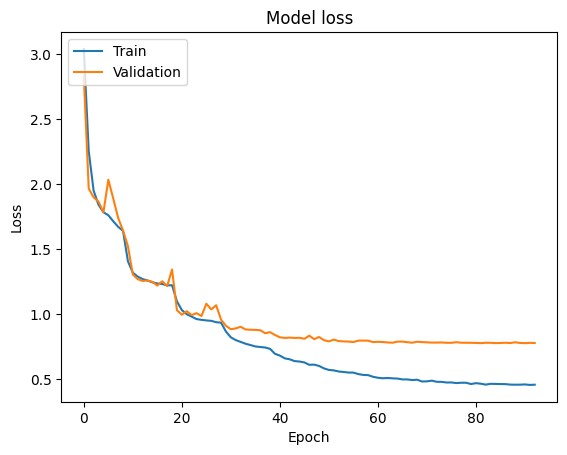

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history_model_1.history['loss'])
plt.plot(history_model_1.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

## Training Accuracy VS Validation Accuracy

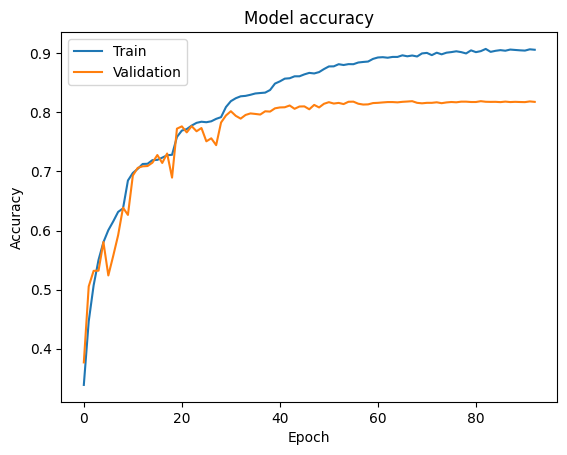

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history_model_1.history['accuracy'])
plt.plot(history_model_1.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

### Training the model with Data Augmentation on the flow

In [ ]:
%%time
# Learning rate schedule for adam optimizer
def lr_schedule(epoch):
    initial_lr = 0.001
    drop = 0.5
    epochs_drop = 10.0
    lr = initial_lr * np.power(drop, np.floor((1+epoch)/epochs_drop))
    return lr

# Training the model with static data augmentation
history_model_1 = CNN_model_1.fit(train_generator, epochs=N_EPOCH, batch_size=BATCH_SIZE,
                                  validation_data=(X_val, Y_val),
                                  callbacks=[early_stopping,
                                  tf.keras.callbacks.LearningRateScheduler(lr_schedule)])

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 46s 28ms/step - accuracy: 0.2644 - loss: 2.2005 - val_accuracy: 0.4196 - val_loss: 1.9700 - learning_rate: 0.0010
Epoch 2/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 35s 28ms/step - accuracy: 0.4314 - loss: 1.9513 - val_accuracy: 0.4479 - val_loss: 2.1100 - learning_rate: 0.0010
Epoch 3/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 61s 45ms/step - accuracy: 0.4869 - loss: 1.9095 - val_accuracy: 0.4821 - val_loss: 2.1328 - learning_rate: 0.0010
Epoch 4/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 53s 42ms/step - accuracy: 0.5220 - loss: 1.8780 - val_accuracy: 0.4573 - val_loss: 2.2660 - learning_rate: 0.0010
Epoch 5/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 36s 29ms/step - accuracy: 0.5447 - loss: 1.8426 - val_accuracy: 0.5265 - val_loss: 1.9603 - learning_rate: 0.0010
Epoch 6/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 42s 29ms/step - accuracy: 0.5657 - loss: 1.7803 - val_accuracy: 0.5315 - val_loss: 1.9873 - learning_rate: 0.0010
Epoch 7/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 44s 31ms/step - accuracy: 0

In [ ]:
CNN_model_1.evaluate(X_test,Y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8417 - loss: 0.6145


[0.6180810332298279, 0.840399980545044]

## Training Loss VS Validation Loss

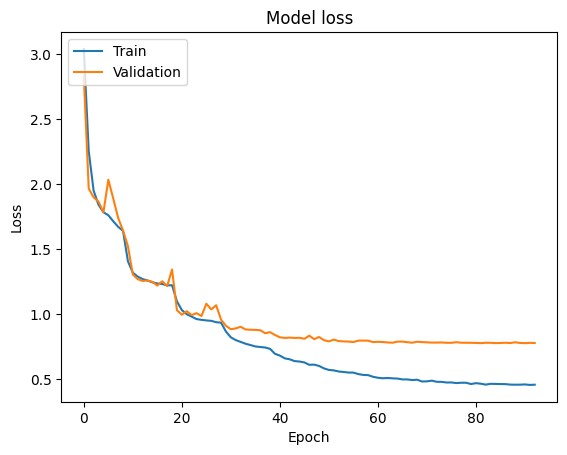

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history_model_1.history['loss'])
plt.plot(history_model_1.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

## Training Accuracy VS Validation Accuracy

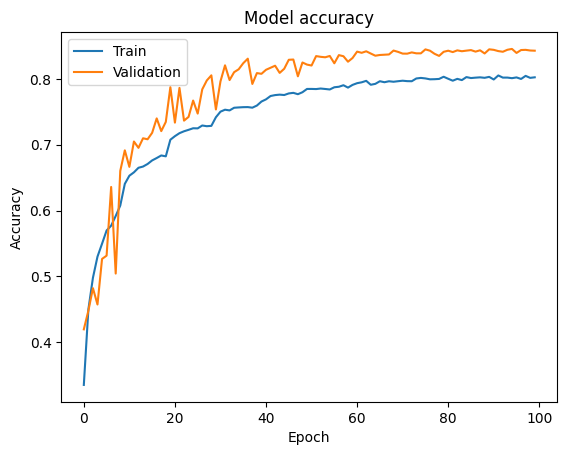

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history_model_1.history['accuracy'])
plt.plot(history_model_1.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

#### Classification Report for the First Model

In [ ]:
Y_prediction_model_1 = CNN_model_1.predict(X_test)
pred_classes_model_1 = [np.argmax(element) for element in Y_prediction_model_1]

print("C1assification Report: \n", classification_report(Y_test, pred_classes_model_1))

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step
C1assification Report: 
               precision    recall  f1-score   support

           0       0.90      0.84      0.87      1000
           1       0.92      0.94      0.93      1000
           2       0.89      0.69      0.78      1000
           3       0.81      0.64      0.72      1000
           4       0.84      0.81      0.83      1000
           5       0.85      0.73      0.79      1000
           6       0.65      0.97      0.78      1000
           7       0.88      0.90      0.89      1000
           8       0.93      0.93      0.93      1000
           9       0.82      0.95      0.88      1000

    accuracy                           0.84     10000
   macro avg       0.85      0.84      0.84     10000
weighted avg       0.85      0.84      0.84     10000



#### Saving and downloading the model
#### The model which was trained on the train generator was selected as final model due to its better test accuracy and generalization

In [ ]:
from google.colab import files

CNN_model_1.save("CNN_model_1.h5", save_format='tf')
files.download('CNN_model_1.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## CNN Model 2: Enhanced Model with Batch Normalization and Deeper Architecture

This document builds upon the baseline CNN model (CNN_model_1) by introducing key improvements for image classification.

## Key Improvements

*   **Batch Normalization:** `BatchNormalization` layers are strategically placed after each convolutional layer in all convolutional blocks. This technique helps to:
    *   Stabilize the training process.
    *   Accelerate convergence.
    *   Potentially improve overall model performance.
*   **Deeper Architecture:** A fourth convolutional block with increasing filter counts (up to 256) has been added to the model. This allows the network to extract more complex features from the input images.

## Model Architecture

The model consists of the following layers:

*   **Convolutional Layers:**
    *   Four convolutional blocks, each with:
        *   Two `Conv2D` layers with increasing filter counts (32, 64, 128, 256)
        *   `kernel_size` of (3, 3) for all convolutional layers.
        *   `padding='same'` to preserve spatial dimensions.
        *   `BatchNormalization` layer after each `Conv2D` layer.
        *   `relu` activation function for introducing non-linearity.
    *   `MaxPooling2D` layers with a pool size of (2, 2) for downsampling after each block.
    *   `Dropout` layers with a rate of 0.25 to prevent overfitting in the convolutional blocks, except for the third block with 0.4 and the second block with 0.35.
    *   `l2` kernel regularization (weight decay) with a learning rate of 0.001 to prevent overfitting (determined by experiments).

*   **Dense Layers:**
    *   `Flatten` layer to convert feature maps into a 1D vector.
    *   Two `Dense` layers with 1024 and 512 neurons, respectively, both using `relu` activation.
    *   `Dropout` layers with varying rates (0.35 and 0.4) for regularization.
    *   Output `Dense` layer with `N_CLASSES` neurons and `softmax` activation for probability distribution over classes.

## Model Compilation and Training

*   **Optimizer:** `adam` optimizer with a learning rate of 0.001.
*   **Loss Function:** `sparse_categorical_crossentropy`.
*   **Metrics:** `accuracy`.

**Training Options:**

The code showcases two training approaches:

1.  **Static Data Augmentation:**
    *   A custom learning rate scheduler function `lr_schedule` is defined to reduce the learning rate by a factor of 0.5 every 10 epochs.
    *   The model is trained using pre-augmented data (`X_train_aug` and `Y_train`) with validation data (`X_val_aug` and `Y_val`).
    *   Early stopping and the learning rate scheduler are included as callbacks during training.

2.  **On-the-fly Data Augmentation:**
    *   An `ImageDataGenerator` object (`datagen`) is defined to implement real-time data augmentation techniques like rotation, shifting, shearing, zooming, and horizontal flipping.
    *   The `flow` method from `ImageDataGenerator` creates a training generator (`train_generator`) that applies these transformations during training.
    *   The model is trained using the training generator and the original validation data (`X_val` and `Y_val`).
    *   Similar callbacks (early stopping and learning rate scheduler) are used for training control.

## Compiling the model

In [ ]:
%%time
CNN_model_2 = models.Sequential([

    # First Convolutional Block
    layers.Conv2D(filters=32, kernel_size=(3, 3), padding='same', input_shape=INPUT_SHAPE, kernel_regularizer=regularizers.l2(l2=0.001)),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.Conv2D(filters=32, kernel_size=(3, 3), padding='same', kernel_regularizer=regularizers.l2(l2=0.001)),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    # Second Convolutional Block
    layers.Conv2D(filters=64, kernel_size=(3, 3), padding='same', kernel_regularizer=regularizers.l2(l2=0.001)),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.Conv2D(filters=64, kernel_size=(3, 3), padding='same', kernel_regularizer=regularizers.l2(l2=0.001)),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.35),

    # Third Convolutional Block
    layers.Conv2D(filters = 128, kernel_size = (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(l2=0.001)),
    layers.BatchNormalization(),
    layers.Conv2D(filters = 128, kernel_size = (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(l2=0.001)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.4),


    # Fourth Convolutional Block
    layers.Conv2D(filters = 256, kernel_size = (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(l2=0.001)),
    layers.BatchNormalization(),
    layers.Conv2D(filters = 256, kernel_size = (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(l2=0.001)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    # Fully connected layers for classification
    layers.Flatten(),
    layers.Dense(1024, activation='relu',kernel_regularizer=regularizers.l2(l2=0.001)),
    layers.BatchNormalization(),
    layers.Dropout(0.35),
    layers.Dense(512, activation='relu',kernel_regularizer=regularizers.l2(l2=0.001)),
    layers.BatchNormalization(),
    layers.Dropout(0.4),
    layers.Dense(N_CLASSES, activation='softmax')
    ])


CNN_model_2.compile(optimizer=Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

CPU times: user 158 ms, sys: 1.37 ms, total: 159 ms
Wall time: 164 ms


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
CNN_model_2.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_18 (Conv2D)                   │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_23               │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_12 (Activation)           │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_24               │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_13 (Activation)           │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_15 (Dropout)                 │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_20 (Conv2D)                   │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_25               │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_14 (Activation)           │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_21 (Conv2D)                   │ (None, 16, 16, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_26               │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_15 (Activation)           │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_16 (Dropout)                 │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_22 (Conv2D)                   │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_27               │ (None, 8, 8, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_23 (Conv2D)                   │ (None, 8, 8, 128)           │         147,5

 Total params: 2,761,770 (10.54 MB)

 Trainable params: 2,756,778 (10.52 MB)

 Non-trainable params: 4,992 (19.50 KB)

### Training the model - with static data augmentation to increase the training speed  

In [ ]:
%%time
# Learning rate schedule for adam optimizer
def lr_schedule(epoch):
    initial_lr = 0.001
    drop = 0.5
    epochs_drop = 10.0
    lr = initial_lr * np.power(drop, np.floor((1+epoch)/epochs_drop))
    return lr

# Training the model with static data augmentation
history_model_2 = CNN_model_2.fit(X_train_aug, Y_train, epochs=N_EPOCH, batch_size=BATCH_SIZE,
                                  validation_data=(X_val_aug, Y_val),
                                  callbacks=[early_stopping,
                                  tf.keras.callbacks.LearningRateScheduler(lr_schedule)])

Epoch 1/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 36s 13ms/step - accuracy: 0.2522 - loss: 4.6967 - val_accuracy: 0.4198 - val_loss: 2.9952 - learning_rate: 0.0010
Epoch 2/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.4107 - loss: 2.7748 - val_accuracy: 0.4383 - val_loss: 2.2853 - learning_rate: 0.0010
Epoch 3/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.4779 - loss: 2.0926 - val_accuracy: 0.4405 - val_loss: 2.1208 - learning_rate: 0.0010
Epoch 4/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.5065 - loss: 1.9371 - val_accuracy: 0.5650 - val_loss: 1.7623 - learning_rate: 0.0010
Epoch 5/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - accuracy: 0.5414 - loss: 1.8630 - val_accuracy: 0.5018 - val_loss: 2.0264 - learning_rate: 0.0010
Epoch 6/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 13s 11ms/step - accuracy: 0.5651 - loss: 1.8390 - val_accuracy: 0.5404 - val_loss: 1.9043 - learning_rate: 0.0010
Epoch 7/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 19s 9ms/step - acc

In [ ]:
CNN_model_2.evaluate(X_test, Y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7666 - loss: 1.0969


[1.1185661554336548, 0.7626000046730042]

#### Classification Report for the Second Model

In [ ]:
Y_prediction_model_2 = CNN_model_2.predict(X_test)
pred_classes_model_2 = [np.argmax(element) for element in Y_prediction_model_2]

print("C1assification Report: \n", classification_report(Y_test, pred_classes_model_2))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
C1assification Report: 
               precision    recall  f1-score   support

           0       0.76      0.85      0.80      1000
           1       0.92      0.91      0.91      1000
           2       0.78      0.65      0.71      1000
           3       0.73      0.53      0.61      1000
           4       0.77      0.64      0.70      1000
           5       0.83      0.54      0.66      1000
           6       0.50      0.95      0.66      1000
           7       0.85      0.82      0.83      1000
           8       0.88      0.86      0.87      1000
           9       0.86      0.88      0.87      1000

    accuracy                           0.76     10000
   macro avg       0.79      0.76      0.76     10000
weighted avg       0.79      0.76      0.76     10000



## Training Loss VS Validation Loss

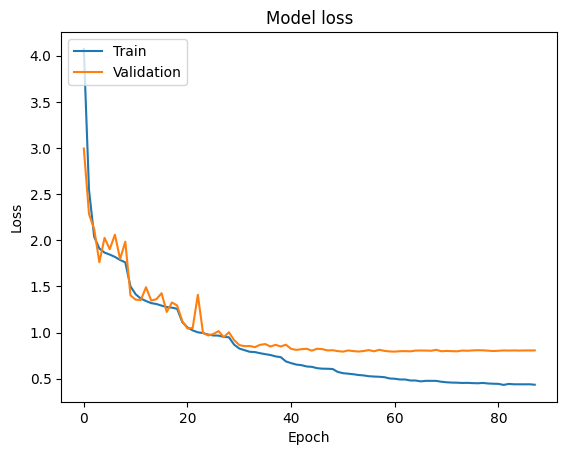

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history_model_2.history['loss'])
plt.plot(history_model_2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

## Training Accuracy VS Validation Accuracy

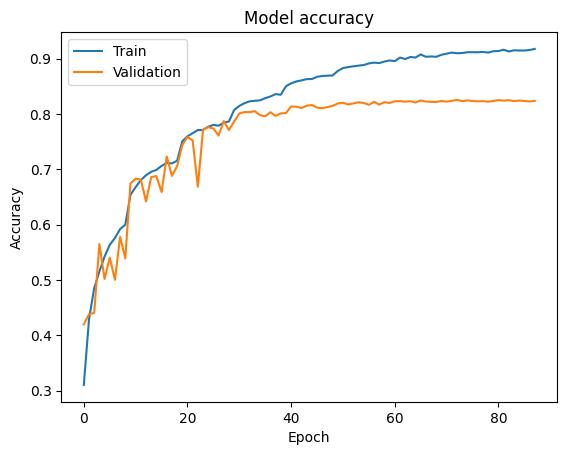

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history_model_2.history['accuracy'])
plt.plot(history_model_2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

### Training the model with Data Augmentation on the flow

In [ ]:
%%time
# Learning rate schedule for adam optimizer
def lr_schedule(epoch):
    initial_lr = 0.001
    drop = 0.5
    epochs_drop = 10.0
    lr = initial_lr * np.power(drop, np.floor((1+epoch)/epochs_drop))
    return lr

# Training the model with static data augmentation
history_model_2 = CNN_model_2.fit(train_generator, epochs=N_EPOCH, batch_size=BATCH_SIZE,
                                  validation_data=(X_val, Y_val),
                                  callbacks=[tf.keras.callbacks.LearningRateScheduler(lr_schedule)])

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 58s 33ms/step - accuracy: 0.2479 - loss: 4.7768 - val_accuracy: 0.4371 - val_loss: 2.9621 - learning_rate: 0.0010
Epoch 2/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 40s 32ms/step - accuracy: 0.3937 - loss: 2.8536 - val_accuracy: 0.4701 - val_loss: 2.1290 - learning_rate: 0.0010
Epoch 3/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 40s 32ms/step - accuracy: 0.4525 - loss: 2.1291 - val_accuracy: 0.5037 - val_loss: 1.8242 - learning_rate: 0.0010
Epoch 4/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 37s 30ms/step - accuracy: 0.4877 - loss: 1.9352 - val_accuracy: 0.4393 - val_loss: 2.1721 - learning_rate: 0.0010
Epoch 5/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 38s 31ms/step - accuracy: 0.5257 - loss: 1.8675 - val_accuracy: 0.5279 - val_loss: 1.8692 - learning_rate: 0.0010
Epoch 6/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 53s 42ms/step - accuracy: 0.5386 - loss: 1.8694 - val_accuracy: 0.4504 - val_loss: 2.1486 - learning_rate: 0.0010
Epoch 7/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 52s 42ms/step - accuracy: 0

In [ ]:
CNN_model_2.evaluate(X_test, Y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8653 - loss: 0.5586


[0.5646052956581116, 0.8607000112533569]

#### Classification Report for the Second Model

In [ ]:
Y_prediction_model_2 = CNN_model_2.predict(X_test)
pred_classes_model_2 = [np.argmax(element) for element in Y_prediction_model_2]

print("C1assification Report: \n", classification_report(Y_test, pred_classes_model_2))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
C1assification Report: 
               precision    recall  f1-score   support

           0       0.90      0.85      0.88      1000
           1       0.93      0.94      0.94      1000
           2       0.90      0.78      0.84      1000
           3       0.82      0.67      0.74      1000
           4       0.86      0.85      0.86      1000
           5       0.87      0.75      0.80      1000
           6       0.71      0.97      0.82      1000
           7       0.91      0.90      0.90      1000
           8       0.92      0.93      0.93      1000
           9       0.85      0.95      0.90      1000

    accuracy                           0.86     10000
   macro avg       0.87      0.86      0.86     10000
weighted avg       0.87      0.86      0.86     10000



## Training Loss VS Validation Loss

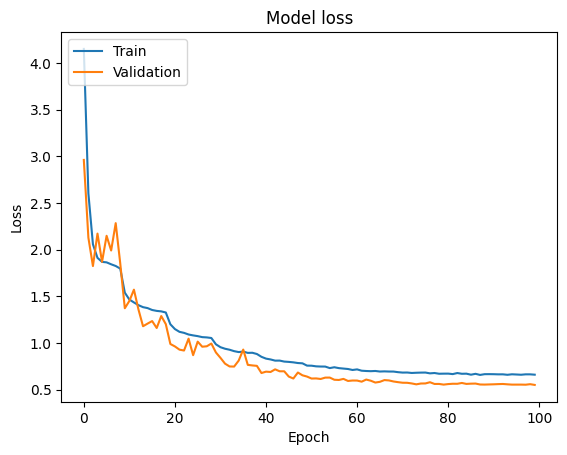

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history_model_2.history['loss'])
plt.plot(history_model_2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

## Training Accuracy VS Validation Accuracy

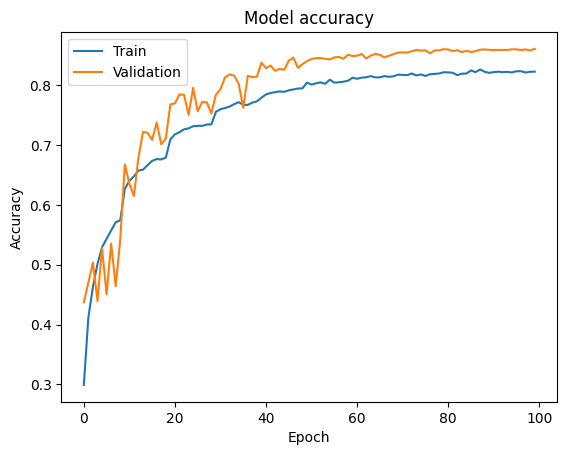

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history_model_2.history['accuracy'])
plt.plot(history_model_2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

#### Saving and downloading the model
#### The model which was trained on the train generator was selected as final model due to its better test accuracy and generalization

In [ ]:
CNN_model_2.save("CNN_model_2.h5", save_format='tf')
files.download('CNN_model_2.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## CNN Model 3: Leveraging Residual Connections and Extensive Regularization (ResNet Inspired)

This document introduces CNN_model_3, a refined convolutional neural network architecture for image classification. It builds upon previous models by incorporating residual connections and L2 regularization for improved performance and generalization.

## Key Improvements

*   **Residual Connections ([ResNet Inspired](https://keras.io/api/applications/resnet/)):** This model draws inspiration from the `ResNet50` architecture by implementing residual blocks. These connections help address the vanishing gradient problem, which can hinder training in very deep networks. By adding the input of a block to its output, the network can learn identity mappings, allowing gradients to flow more easily through the network. This facilitates the training of deeper and more complex models.
*   **Extensive Batch Normalization:** `BatchNormalization` layers are strategically placed after every convolutional layer and dense layer to stabilize training and improve convergence.
*   **L2 Regularization:** `L2` weight regularization with a value of **0.001** is applied to all convolutional layers in the model to prevent overfitting(determined by experiments).
*   **Dropout Layers:** `Dropout` layers with varying rates (**0.25** to **0.5**) are strategically placed to further reduce overfitting, particularly in deeper layers.

## Model Architecture

The model consists of the following layers:

*   **Convolutional Layers:**
    *   **Initial Convolution:**
        *   A single `Conv2D` layer with **32** filters, a kernel size of (**3**, **3**), and `relu` activation for initial feature extraction.
    *   **Three Residual Blocks:**
        *   Each residual block consists of:
            *   A bottleneck layer with a `Conv2D` layer having **1** filter and a kernel size of (**1**, **1**) for dimensionality reduction.
            *   Two `Conv2D` layers with increasing filter counts (e.g., **64**, **128**, **256**) and a kernel size of (**3**, **3**) for feature extraction.
            *   `BatchNormalization` layers after each `Conv2D` layer.
            *   `relu` activation after each `Conv2D` layer.
            *   A skip connection that adds the element-wise sum of the input to the residual block's output.
    *   `MaxPooling2D` layers with a pool size of (**2**, **2**) for downsampling after each residual block.
    *   `Dropout` layers with increasing rates (**0.25** to **0.4**) after each residual block for overfitting prevention.

*   **Dense Layers:**
    *   `Flatten` layer to convert feature maps into a 1D vector.
    *   Two fully-connected `Dense` layers with **1024** and **512** neurons, respectively, both using `relu` activation and followed by `BatchNormalization`.
    *   `Dropout` layers with a rate of **0.5** after each dense layer for overfitting control.
    *   Output `Dense` layer with `N_CLASSES` neurons and `softmax` activation for probability distribution over classes.

## Model Compilation and Training

*   **Optimizer:** `adam` optimizer with a learning rate of **0.001**.
*   **Loss Function:** `sparse_categorical_crossentropy`.
*   **Metrics:** `accuracy`.
*   **Training:** The model is trained using augmented data from `ImageDataGenerator` and a custom learning rate scheduler.
    *   **Data Augmentation:** On-the-fly data augmentation utilizes techniques like rotation, shifting, shearing, zooming, and horizontal flipping to improve the model's generalization capabilities.
    *   **Learning Rate Scheduling:** A custom learning rate scheduler (`lr_schedule`) is employed to dynamically adjust the learning rate during training. This scheduler reduces the learning rate by a factor of **0.5** every **10** epochs, which can facilitate convergence to a better minimum.


This refined architecture, inspired by ResNet's residual connections, combined with extensive regularization and strategic dropout layers, aims to achieve improved performance and generalization on image classification tasks by addressing the vanishing gradient problem and mitigating overfitting.

##Compliling the model

In [ ]:
%%time
L2_VALUE = 0.001
# Input layer
inputs = layers.Input(shape=INPUT_SHAPE)

# Initial convolution
x = layers.Conv2D(filters=32, kernel_size=(3, 3), padding='same',kernel_regularizer=regularizers.l2(L2_VALUE))(inputs)
x = layers.BatchNormalization()(x)
x = layers.Activation('relu')(x)

# First Residual Block
residual = layers.Conv2D(filters=64, kernel_size=(1, 1), padding='same',kernel_regularizer=regularizers.l2(L2_VALUE))(x)

x = layers.Conv2D(filters=64, kernel_size=(3, 3), padding='same',kernel_regularizer=regularizers.l2(L2_VALUE))(x)
x = layers.BatchNormalization()(x)
x = layers.Activation('relu')(x)

x = layers.Conv2D(filters=64, kernel_size=(3, 3), padding='same',kernel_regularizer=regularizers.l2(L2_VALUE))(x)
x = layers.BatchNormalization()(x)

# Merging the first residual block with the convolution layer
x = layers.Add()([x, residual])
x = layers.Activation('relu')(x)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Dropout(0.25)(x)

# Second Residual Block
residual = layers.Conv2D(filters=128, kernel_size=(1, 1), padding='same',kernel_regularizer=regularizers.l2(L2_VALUE))(x)

x = layers.Conv2D(filters=128,kernel_size=(3, 3), padding='same',kernel_regularizer=regularizers.l2(L2_VALUE))(x)
x = layers.BatchNormalization()(x)
x = layers.Activation('relu')(x)

x = layers.Conv2D(filters=128, kernel_size=(3, 3), padding='same',kernel_regularizer=regularizers.l2(L2_VALUE))(x)
x = layers.BatchNormalization()(x)

# Merging the second residual block with the convolution layer
x = layers.Add()([x, residual])
x = layers.Activation('relu')(x)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Dropout(0.35)(x)

# Third Residual Block
residual = layers.Conv2D(filters=256,kernel_size= (1, 1), padding='same',kernel_regularizer=regularizers.l2(L2_VALUE))(x)

x = layers.Conv2D(filters=256,kernel_size= (3, 3), padding='same',kernel_regularizer=regularizers.l2(L2_VALUE))(x)
x = layers.BatchNormalization()(x)
x = layers.Activation('relu')(x)

x = layers.Conv2D(filters=256,kernel_size= (3, 3), padding='same',kernel_regularizer=regularizers.l2(L2_VALUE))(x)
x = layers.BatchNormalization()(x)

# Merging the third residual block with the convolution layer
x = layers.Add()([x, residual])
x = layers.Activation('relu')(x)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Dropout(0.4)(x)

# Fully Connected Layers for classifications
x = layers.Flatten()(x)
x = layers.Dense(1024, activation='relu',kernel_regularizer=regularizers.l2(L2_VALUE))(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(512, activation='relu',kernel_regularizer=regularizers.l2(L2_VALUE))(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.5)(x)

# Output layer
outputs = layers.Dense(N_CLASSES, activation='softmax')(x)

# Creating the model
CNN_model_3 = tf.keras.Model(inputs=inputs, outputs=outputs)

# Compiling the model
CNN_model_3.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

CPU times: user 246 ms, sys: 3.84 ms, total: 250 ms
Wall time: 274 ms


In [ ]:
CNN_model_3.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 32, 32, 3)      │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_10 (Conv2D)        │ (None, 32, 32, 32)     │            896 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_9     │ (None, 32, 32, 32)     │            128 │ conv2d_10[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_7 (Activation) │ (None, 32, 32, 32)     │              0 │ batch_normalization_9… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_12 (Conv2D)        │ (None, 32, 32, 64)     │         18,496 │ activation_7[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_10    │ (None, 32, 32, 64)     │            256 │ conv2d_12[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_8 (Activation) │ (None, 32, 32, 64)     │              0 │ batch_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_13 (Conv2D)        │ (None, 32, 32, 64)     │         36,928 │ activation_8[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_11    │ (None, 32, 32, 64)     │            256 │ conv2d_13[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_11 (Conv2D)        │ (None, 32, 32, 64)     │          2,112 │ activation_7[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_3 (Add)               │ (None, 32, 32, 64)     │              0 │ batch_normalization_1… │
│                           │                        │                │ conv2d_11[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_9 (Activation) │ (None, 32, 32, 64)     │              0 │ add_3[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_3           │ (None, 16, 16, 64)     │              0 │ activation_9[0][0]     │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_5 (Dropout)       │ (None, 16, 16, 64)     │              0 │ max_pooling2d_3[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_15 (Conv2D)        │ (None, 16, 16, 128)    │         73,856 │ dropout_5[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_12    │ (None, 16, 16, 128)    │            512 │ conv2d_15[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├──────────────────────

 Total params: 5,941,578 (22.67 MB)

 Trainable params: 5,936,650 (22.65 MB)

 Non-trainable params: 4,928 (19.25 KB)

### Training the model

In [ ]:
# Learning rate schedule for adam optimizer
def lr_schedule(epoch):
    initial_lr = 0.001
    drop = 0.5
    epochs_drop = 10.0
    lr = initial_lr * np.power(drop, np.floor((1+epoch)/epochs_drop))
    return lr

# Training the model with data augmentation
history_model_3 = CNN_model_3.fit(train_generator, batch_size = BATCH_SIZE,
                                  epochs=N_EPOCH,callbacks=[tf.keras.callbacks.LearningRateScheduler(lr_schedule)],
                                  validation_data=(X_val, Y_val))

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 98s 54ms/step - accuracy: 0.2585 - loss: 5.3794 - val_accuracy: 0.4106 - val_loss: 3.0997 - learning_rate: 0.0010
Epoch 2/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 90s 30ms/step - accuracy: 0.4282 - loss: 2.8323 - val_accuracy: 0.4619 - val_loss: 2.3272 - learning_rate: 0.0010
Epoch 3/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 46s 34ms/step - accuracy: 0.4877 - loss: 2.2141 - val_accuracy: 0.5135 - val_loss: 2.2696 - learning_rate: 0.0010
Epoch 4/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 65s 52ms/step - accuracy: 0.5257 - loss: 2.0676 - val_accuracy: 0.5020 - val_loss: 2.1778 - learning_rate: 0.0010
Epoch 5/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 37s 29ms/step - accuracy: 0.5434 - loss: 2.0192 - val_accuracy: 0.5943 - val_loss: 1.8750 - learning_rate: 0.0010
Epoch 6/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 37s 30ms/step - accuracy: 0.5535 - loss: 1.9782 - val_accuracy: 0.5229 - val_loss: 2.1549 - learning_rate: 0.0010
Epoch 7/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 40s 29ms/step - accuracy: 0

In [ ]:
CNN_model_3.evaluate(X_test, Y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8919 - loss: 0.5070


[0.5064396262168884, 0.890999972820282]

Classification Report for the Third model

In [ ]:
Y_prediction_model_3 = CNN_model_3.predict(X_test)
pred_classes_model_3 = [np.argmax(element) for element in Y_prediction_model_3]

print("C1assification Report: \n", classification_report(Y_test, pred_classes_model_3))

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
C1assification Report: 
               precision    recall  f1-score   support

           0       0.92      0.89      0.90      1000
           1       0.94      0.96      0.95      1000
           2       0.91      0.81      0.86      1000
           3       0.88      0.74      0.81      1000
           4       0.91      0.88      0.89      1000
           5       0.88      0.83      0.85      1000
           6       0.77      0.98      0.86      1000
           7       0.94      0.93      0.93      1000
           8       0.94      0.93      0.93      1000
           9       0.86      0.97      0.91      1000

    accuracy                           0.89     10000
   macro avg       0.90      0.89      0.89     10000
weighted avg       0.90      0.89      0.89     10000



## Training Loss VS Validation Loss

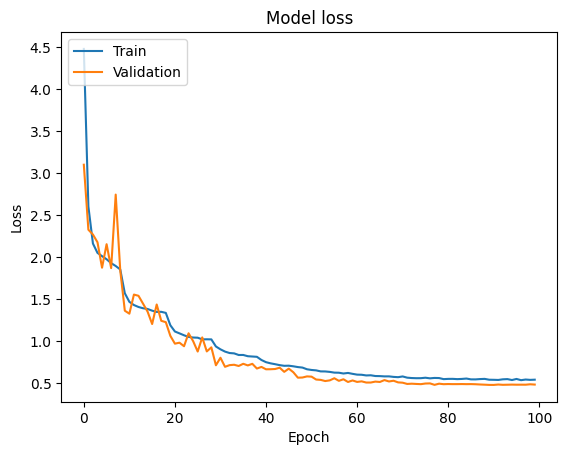

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history_model_3.history['loss'])
plt.plot(history_model_3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

## Training Accuracy VS Validation Accuracy

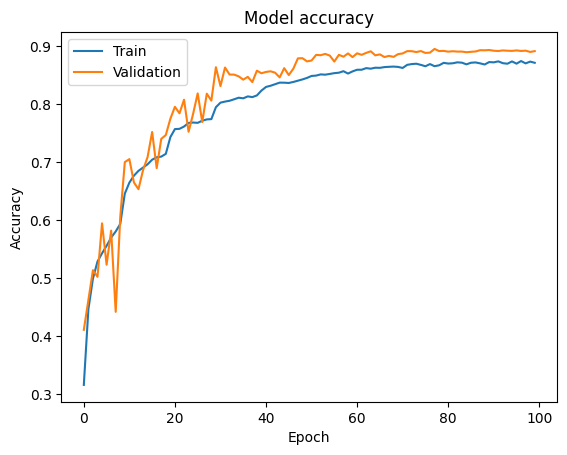

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history_model_3.history['accuracy'])
plt.plot(history_model_3.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

### Saving the model

In [ ]:
CNN_model_3.save("CNN_model_3_alpha.h5", save_format='tf')
files.download('CNN_model_3_alpha.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Using Ensembling Techniques such as:
###1. Simple Averaging
###2. Majority Vote

# Loading the models

In [2]:
model_1 = tf.keras.models.load_model("/content/CNN_model_1.h5")
model_2 = tf.keras.models.load_model("/content/CNN_model_2.h5")
model_3 = tf.keras.models.load_model("/content/CNN_model_3.h5")

In [ ]:
model_1.evaluate(X_test,Y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.8417 - loss: 0.6145


[0.6180811524391174, 0.840399980545044]

# Confusion Matrix for Model-1

### For the Training Set

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step


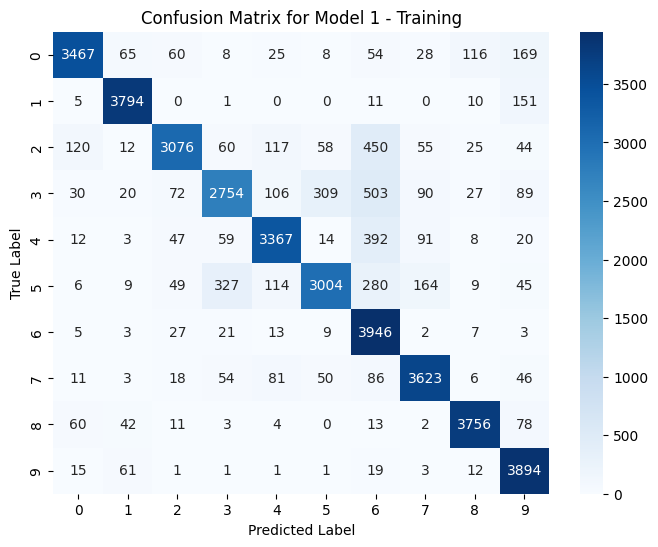

In [ ]:
Y_pred_1_train = model_1.predict(X_train)
Y_pred_classes_1_train = np.argmax(Y_pred_1_train, axis=1)
cm_1_train = confusion_matrix(Y_train, Y_pred_classes_1_train)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_1_train, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Model 1 - Training')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

### For the Test Set

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


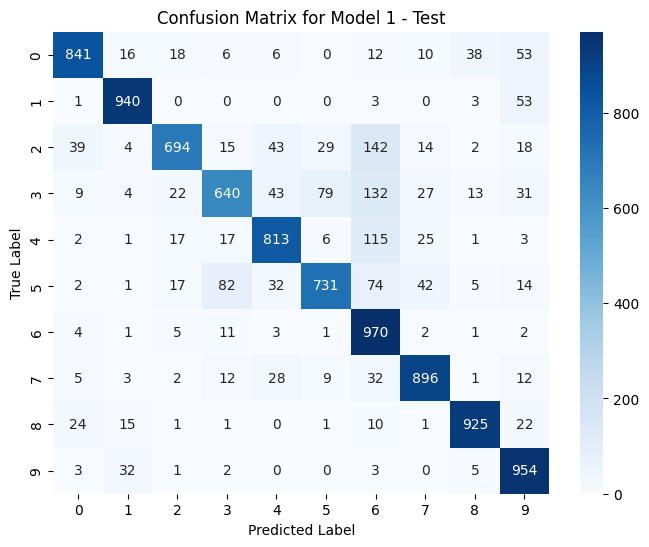

In [ ]:
Y_pred_1_test = model_1.predict(X_test)
Y_pred_classes_1_test = np.argmax(Y_pred_1_test, axis=1)
cm_1_test = confusion_matrix(Y_test, Y_pred_classes_1_test)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_1_test, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Model 1 - Test')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
model_2.evaluate(X_test,Y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.8653 - loss: 0.5586


[0.5646052360534668, 0.8607000112533569]

# Confusion Matrix for Model-2

### For the Training Set

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step


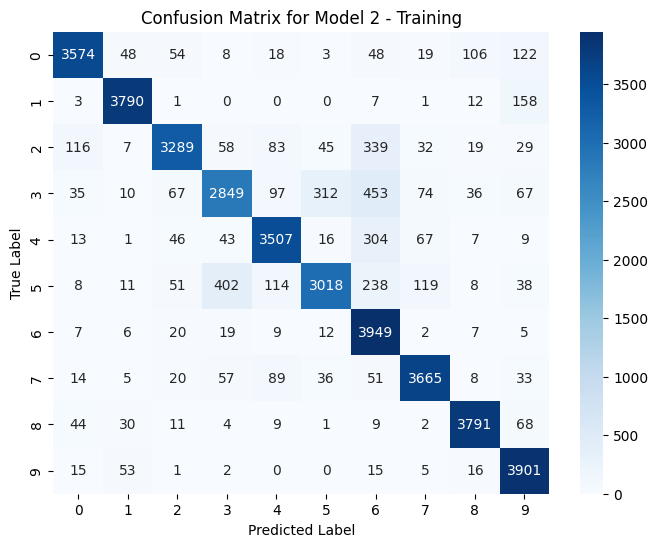

In [ ]:
Y_pred_2_train = model_2.predict(X_train)
Y_pred_classes_2_train = np.argmax(Y_pred_2_train, axis=1)
cm_2_train = confusion_matrix(Y_train, Y_pred_classes_2_train)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_2_train, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Model 2 - Training')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

### For the Test Set

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


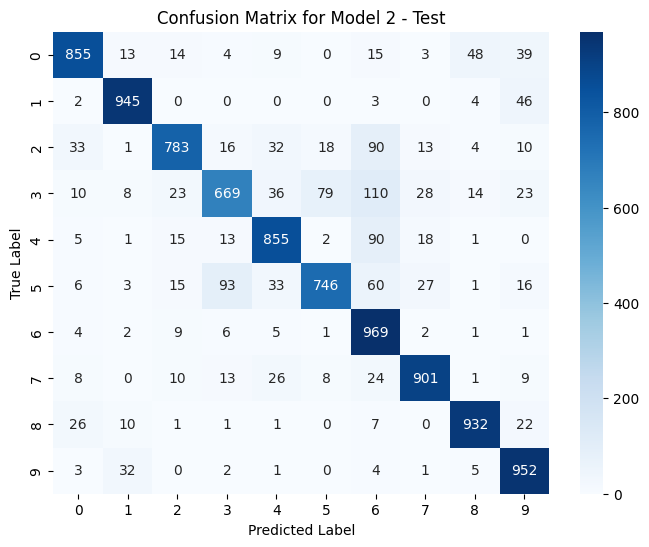

In [ ]:
Y_pred_2_test = model_2.predict(X_test)
Y_pred_classes_2_test = np.argmax(Y_pred_2_test, axis=1)
cm_2_test = confusion_matrix(Y_test, Y_pred_classes_2_test)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_2_test, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Model 2 - Test')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
model_3.evaluate(X_test,Y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 12s 17ms/step - accuracy: 0.8919 - loss: 0.5070


[0.5064396262168884, 0.890999972820282]

# Confusion Matrix for Model-3

### For the Training Set

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step


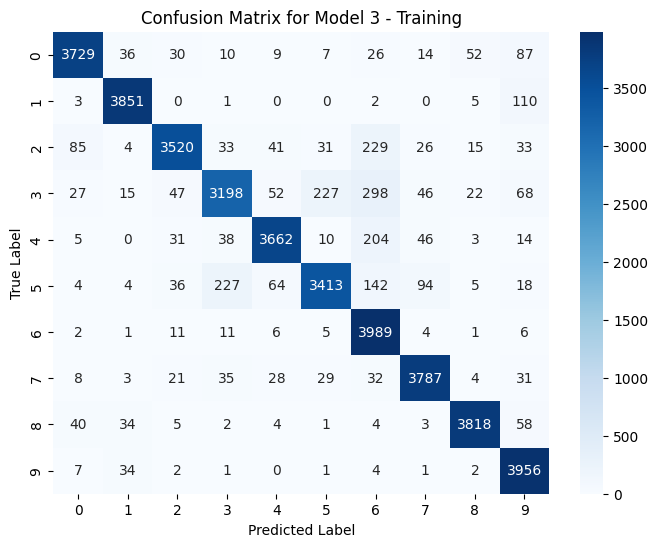

In [ ]:
Y_pred_3_train = model_3.predict(X_train)
Y_pred_classes_3_train = np.argmax(Y_pred_3_train, axis=1)
cm_3_train = confusion_matrix(Y_train, Y_pred_classes_3_train)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_3_train, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Model 3 - Training')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

### For the test set

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step


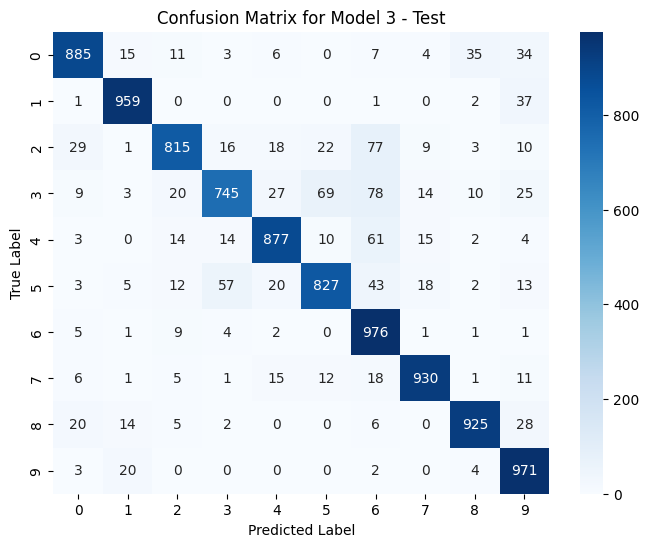

In [ ]:
import seaborn as sns
Y_pred_3_test = model_3.predict(X_test)
Y_pred_classes_3_test = np.argmax(Y_pred_3_test, axis=1)
cm_3_test = confusion_matrix(Y_test, Y_pred_classes_3_test)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_3_test, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Model 3 - Test')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

## Ensembling using Simple Averaging

#### On Training set

In [ ]:
def ensemble_predictions(model1, model2, model3, X):
  pred1 = model1.predict(X)
  pred2 = model2.predict(X)
  pred3 = model3.predict(X)
  ensemble_pred = np.mean([pred1,pred2, pred3], axis=0)
  return ensemble_pred

# Getting the ensemble predictions for the test set
ensemble_preds = ensemble_predictions(model_1, model_2, model_3, X_train)

# Calculating the accuracy
predicted_classes_training = np.argmax(ensemble_preds, axis=1)
true_classes = Y_train
accuracy = np.mean(predicted_classes_training == true_classes)
print("Ensemble Accuracy:", accuracy)

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step
Ensemble Accuracy: 0.91055


#### On Test set

In [ ]:
def ensemble_predictions(model1, model2, model3, X):
  pred1 = model1.predict(X)
  pred2 = model2.predict(X)
  pred3 = model3.predict(X)
  ensemble_pred = np.mean([pred1,pred2, pred3], axis=0)
  return ensemble_pred

# Getting the ensemble predictions for the test set
ensemble_preds = ensemble_predictions(model_1, model_2, model_3, X_test)

# Calculating the accuracy
predicted_classes_training = np.argmax(ensemble_preds, axis=1)
true_classes = Y_test
accuracy = np.mean(predicted_classes_training == true_classes)
print("Ensemble Accuracy:", accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
Ensemble Accuracy: 0.8792


## Using Ensemble using Majority Vote method

### On Training set

In [ ]:
def ensemble_predictions_majority_vote(model1,model2,model3, X):
    pred1 = model1.predict(X)
    pred2 = model2.predict(X)
    pred3 = model3.predict(X)

    # predicted class for each model
    pred_class1 = np.argmax(pred1, axis=1)
    pred_class2 = np.argmax(pred2, axis=1)
    pred_class3 = np.argmax(pred3, axis=1)

    # Stacking the predictions to get a (num_samples, num_models) array
    stacked_predictions = np.stack([pred_class1,pred_class2,  pred_class3], axis=1)

    # Calculating the majority vote for each sample
    majority_vote = np.apply_along_axis(lambda x: np.bincount(x).argmax(), axis=1, arr=stacked_predictions)

    return majority_vote

# Getting the ensemble predictions
ensemble_preds_majority_vote_training = ensemble_predictions_majority_vote(model_1,model_2, model_3, X_train)

# Calculating the accuracy for majority voting
true_classes = Y_train
accuracy_majority_vote = np.mean(ensemble_preds_majority_vote_training == true_classes)
print("Ensemble Accuracy (Majority Vote):", accuracy_majority_vote)

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step
Ensemble Accuracy (Majority Vote): 0.903575


### On Test set

In [ ]:
def ensemble_predictions_majority_vote(model1,model2,model3, X):
    pred1 = model1.predict(X)
    pred2 = model2.predict(X)
    pred3 = model3.predict(X)

    # predicted class for each model
    pred_class1 = np.argmax(pred1, axis=1)
    pred_class2 = np.argmax(pred2, axis=1)
    pred_class3 = np.argmax(pred3, axis=1)

    # Stacking the predictions to get a (num_samples, num_models) array
    stacked_predictions = np.stack([pred_class1,pred_class2,  pred_class3], axis=1)

    # Calculating the majority vote for each sample
    majority_vote = np.apply_along_axis(lambda x: np.bincount(x).argmax(), axis=1, arr=stacked_predictions)

    return majority_vote

# Getting ensemble predictions
ensemble_preds_majority_vote_training = ensemble_predictions_majority_vote(model_1,model_2, model_3, X_test)

# Calculating the accuracy for majority voting
true_classes = Y_test
accuracy_majority_vote = np.mean(ensemble_preds_majority_vote_training == true_classes)
print("Ensemble Accuracy (Majority Vote):", accuracy_majority_vote)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
Ensemble Accuracy (Majority Vote): 0.874


# Interface using Streamlit

## How to Launch `ensemble_classifier.py` Step by Step

---

## **Running Locally**

1. **Save the Script**:
   - Save the Python code into a file named `ensemble_classifier.py`.

2. **Install Required Packages**:
   - Install Streamlit and TensorFlow if not already installed:
     ```bash
     pip install streamlit tensorflow pillow
     ```

3. **Run the Streamlit App**:
   - Open a terminal, navigate to the directory where `ensemble_classifier.py` is saved, and run:
     ```bash
     streamlit run ensemble_classifier.py
     ```

4. **Access the Interface**:
   - After running the above command, Streamlit will provide a local URL (e.g., `http://localhost:8501`). Open this link in your browser to use the app.

---

## **Running in Google Colab using LocalTunnel**

1. **Install Required Libraries**:
   - Run the following command in a Colab cell to install Streamlit and other dependencies:
     ```python
     !pip install streamlit
     ```

2. **Check Streamlit Version**:
   - Before running the app, check if Streamlit is installed correctly:
     ```python
     !streamlit --version
     ```

3. **Run the Script for `ensemble_classifier.py`**:
   - The file will automatially be downloaded and
      then you can launch it using step 5

4. **Getting the Access Code for the Tunnel Website**:
   - Run the following command to get your public IP address:
     ```python
     !curl ipecho.net/plain
     ```

5. **Run the Streamlit App with LocalTunnel**:
   - Use the following code to start the Streamlit app and expose it using LocalTunnel:
     ```python
     !streamlit run Cifar_app.py & npx localtunnel --port 8501
     ```

6. **Access the Interface**:
   - After running the above cell, you will see a public URL (e.g., `https://xxxx.localtunnel.me`). Click this link to access the app and fill in the password as the access code generated above.



#### Installing streamlit


In [3]:
# &>/content/logs.txt & hides the annoying 'Required already satisfied' texts
!pip install streamlit &>/content/logs.txt &

## Ensemble_classifier.py

In [14]:
%%writefile /content/ensemble_classifier.py

import streamlit as st
import tensorflow as tf
import numpy as np
from PIL import Image

# Load the base models
model_1 = tf.keras.models.load_model("CNN_model_1.h5")
model_2 = tf.keras.models.load_model("CNN_model_2.h5")
model_3 = tf.keras.models.load_model("CNN_model_3.h5")

# Class labels for CIFAR-10
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

def preprocess_image(image):
    """
    Preprocesses an image to fit the CIFAR-10 input requirements.
    """
    image = image.resize((32, 32))  # Resize to match CIFAR-10 input size
    image = np.array(image) / 255.0  # Normalize pixel values to [0, 1]
    image = np.expand_dims(image, axis=0)  # Add batch dimension
    return image

def ensemble_predictions_majority_vote(model1, model2, model3, X):
    """
    Predicts the class labels using majority voting from three models.

    Args:
        model1, model2, model3: Trained Keras models.
        X: Input data.

    Returns:
        Predicted class based on majority voting.
    """
    pred1 = model1.predict(X, verbose=0)
    pred2 = model2.predict(X, verbose=0)
    pred3 = model3.predict(X, verbose=0)

    # Determine the predicted class for each model
    pred_class1 = np.argmax(pred1, axis=1)
    pred_class2 = np.argmax(pred2, axis=1)
    pred_class3 = np.argmax(pred3, axis=1)

    # Stack the predictions to get a (num_samples, num_models) array
    stacked_predictions = np.stack([pred_class1, pred_class2, pred_class3], axis=1)

    # Calculate the majority vote for each sample
    majority_vote = np.apply_along_axis(lambda x: np.bincount(x).argmax(), axis=1, arr=stacked_predictions)

    return majority_vote[0]  # Return the majority vote result for the single image

# Streamlit app
st.title("CIFAR-10 Image Classification (Ensemble)")

# Upload image through Streamlit
uploaded_file = st.file_uploader("Choose a CIFAR-10 image...", type=["png", "jpg", "jpeg"])

if uploaded_file is not None:
    # Open the image using PIL
    image = Image.open(uploaded_file)

    # Display the uploaded image
    st.image(image, caption='Uploaded Image', use_container_width=True)

    # Add a button to trigger prediction
    if st.button("Make Prediction"):
        # Preprocess the image
        preprocessed_image = preprocess_image(image)

        # Make predictions using the ensemble with majority voting
        predicted_class_index = ensemble_predictions_majority_vote(model_1, model_2, model_3, preprocessed_image)
        predicted_class = class_names[predicted_class_index]

        # Display the prediction
        st.write(f"Predicted Class: **{predicted_class}**")


Writing /content/ensemble_classifier.py


#### Checking the streamlit version

In [5]:
!streamlit --version

Streamlit, version 1.41.1


###Getting the Access Code for the Tunnel Website

In [6]:
!curl ipecho.net/plain

34.34.78.61

### Running the Streamlit App with LocalTunnel

In [19]:
!streamlit run ensemble_classifier.py & npx localtunnel --port 8501

y


⠙⠹⠸
  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.34.78.61:8501

⠼⠴your url is: https://fuzzy-maps-post.loca.lt
  Stopping...
^C
